# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', family='Malgun Gothic')

## 데이터 살펴보기

### 데이터 불러오기 

In [2]:
df = pd.read_excel('BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


### 변수 설명

| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

- 목표변수 : MEDV, CAT.MEDV
- 설명변수 : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

EDA를 통해 주택 가격에 영향을 미치는 잠재 인자를 도출해낸다.

In [3]:
# 데이터 요약
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [4]:
# unique한 변수의 개수 세기
df.nunique()

CRIM         504
ZN            26
INDUS         76
CHAS           2
NOX           81
RM           446
AGE          356
DIS          412
RAD            9
TAX           66
PTRATIO       46
B            357
LSTAT        455
MEDV         229
CAT. MEDV      2
dtype: int64

- 데이터 요약을 보았을 때 음수값이 들어가있는 데이터는 존재하지 않는다는 것을 알 수 있음(따로 처리할 필요 x)
- CHAS, CAT.MEDV에 binary값이 잘 들어가있음을 알 수 있음
- 값 종류가 많은 CRIM, RM, AGE, DIS,B,LSTAT는 범위별로 분류해 카테고리화하면 좋을 것 같다고 생각함

### 데이터 타입과 결측값 확인하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


- (506, 15) 크기의 데이터

- 실수형 
: CRIM, ZN, INDUS, NOX, RM, AGE, DIS, PTRATIO, B, LSTAT, MEDV
- 정수형
    - 0,1(binary)
    : CHAS, CAT.MEDV
    - 0,1(binary) 아님
    : RAD, TAX

In [6]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

- df.info()에서 확인을 했던 것과 같이 결측치는 존재하지 않는다. 

## 데이터 전처리

### 파생변수 생성





RAD(고속도로 접근성 지수)와 TAX(재산세율), INDUS(비소매상업지역 면적 비율)는 모두 자료가 가운데에 많이 분포하지 않는 쌍봉분포를 하고 있어 두 집단으로 나눠 파생변수를 생성하기로 함
- RAD_cat 변수 생성
- TAX_cat 변수 생성
- INDUS_cat 변수 생성

<AxesSubplot:ylabel='Frequency'>

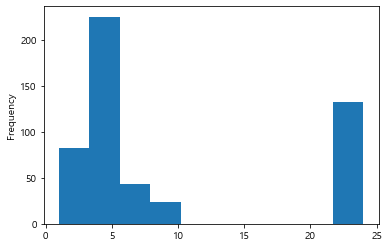

In [53]:
df['RAD'].plot.hist()

- 고속도로 접근성 지수가 20이상인 무리를 '접근 용이(1)'로, 접근성지수가 20이하인 무리를 '접근 용이하지 않음(0)'으로하는 새로운 변수 생성

<AxesSubplot:ylabel='Frequency'>

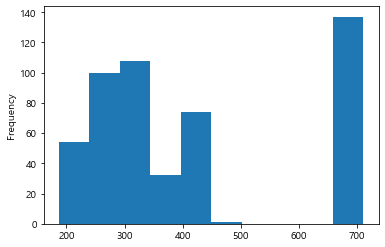

In [56]:
df['TAX'].plot.hist()

- 부동산 세율이 600보다 큰 무리를 '높은 부동산 세율(1)'로, 600보다 작은 무리를 '낮은 부동산 세율(0)'로 하는 새로운 변수 생성

<AxesSubplot:ylabel='Frequency'>

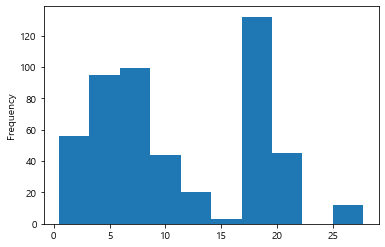

In [55]:
df['INDUS'].plot.hist()

- 소매업 외의 상업이 차지하는 면적이 18보다 큰 무리를 '소매업 적음(1)', 작은 무리를 '소매업 큼(0)'으로 하는 새로운 변수 생성

In [85]:
def get_rad_category(rad):
    if rad>=20:
        return "접근 용이"
    else:
        return "접근 용이하지 않음"
        
        
def get_tax_category(tax):
    if tax>=600:
        return "높은 부동산 세율"
    else:
        return "낮은 부동산 세율"
        
def get_indus_category(indus):
    if indus>=18:
        return "소매업 적음"
    else:
        return "소매업 많음"

In [86]:
df['RAD_cat'] = df['RAD'].map( get_rad_category )
df['TAX_cat'] = df['TAX'].map( get_tax_category )
df['INDUS_cat'] = df['INDUS'].map( get_indus_category )
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,RAD_cat,TAX_cat,INDUS_cat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0,접근 용이하지 않음,낮은 부동산 세율,소매업 많음


## 데이터 분포 확인하기

### 전체 데이터 분포 확인
전체 데이터를 먼저 봐서 관련이 있을 것 같은 변수을 찾아보고자 한다.

#### Histogram
Histogram을 그려 변수 별 데이터 분포 확인

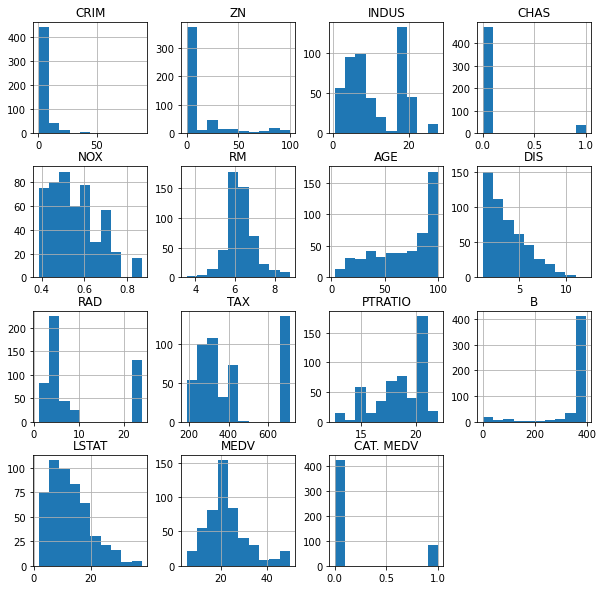

In [7]:
from matplotlib import pyplot
df.hist(figsize=(10,10))
pyplot.show()

- 이 Histogram을 보았을 때 CRIM, ZN, CHAS, CAT.MEDV는 값의 대부분이 0에 쏠려있는 것을 알 수 있다.
- RAD(고속도로 접근성 지수)와 TAX(재산세율), INDUS(비소매상업지역 면적 비율)는 모두 자료가 가운데에 많이 분포하지 않는 쌍봉분포를 하고 있다. 층별화를 통해서 변환하는 것이 필요하다고 생각하였다.

#### Box plot
변수 별 데이터 분포 확인 Box plot을 통해서 outlier를 찾을 수도 있음

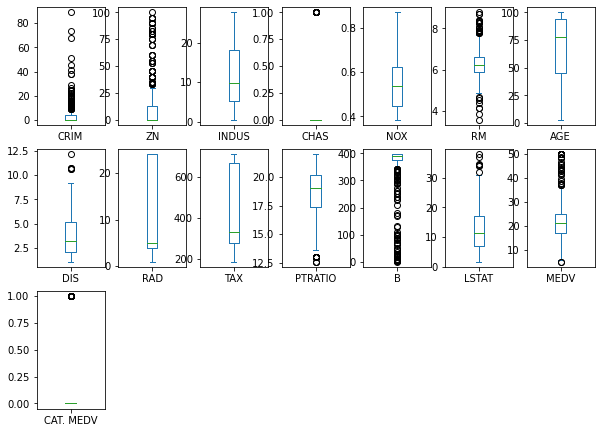

In [8]:
# Box and Whisker Plots
df.plot(kind='box', subplots=True, layout=(4,7), figsize=(10,10), sharex=False, sharey=False)
pyplot.show()

#### Correlation Matrix
Correlation Matrix를 그려서 변수들 간에 어떤 상관관계가 있는지 시각적으로 알아봄

C:\Users\codud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\codud\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


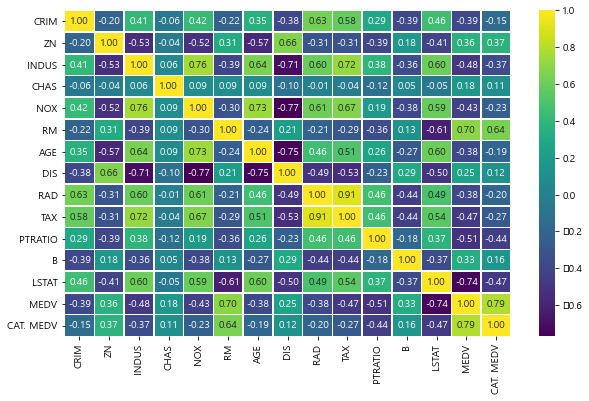

In [87]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="viridis");

- TAX, RAD는 상관계수가 0.91으로 높은 상관관계를 보임
- TAX와 INDUS, NOX와 INDUS, AGE와 NOX, INDUS와 TAX, MEDV와 RM은 양의 상관관계를 갖고 있음
- DIS와 INDUS, DIS와 NOX, DIS와 AGE, LSTAT와 MEDV가 음의 상관관계를 갖고 있음

- 목표변수인 MEDV와 다른 설명변수와의 관계를 확인해봄
- correlation의 절대값이 0.7보다 큰 RM과 LSTAT가 관련이 있을 것이라고 생각하고 우선적으로 분석을 해보기로 함

#### Scatter Matrix
다수의 연속형 변수 간의 분포, 패턴 관계를 동시에 파악하고자 Matrix를 그려봄

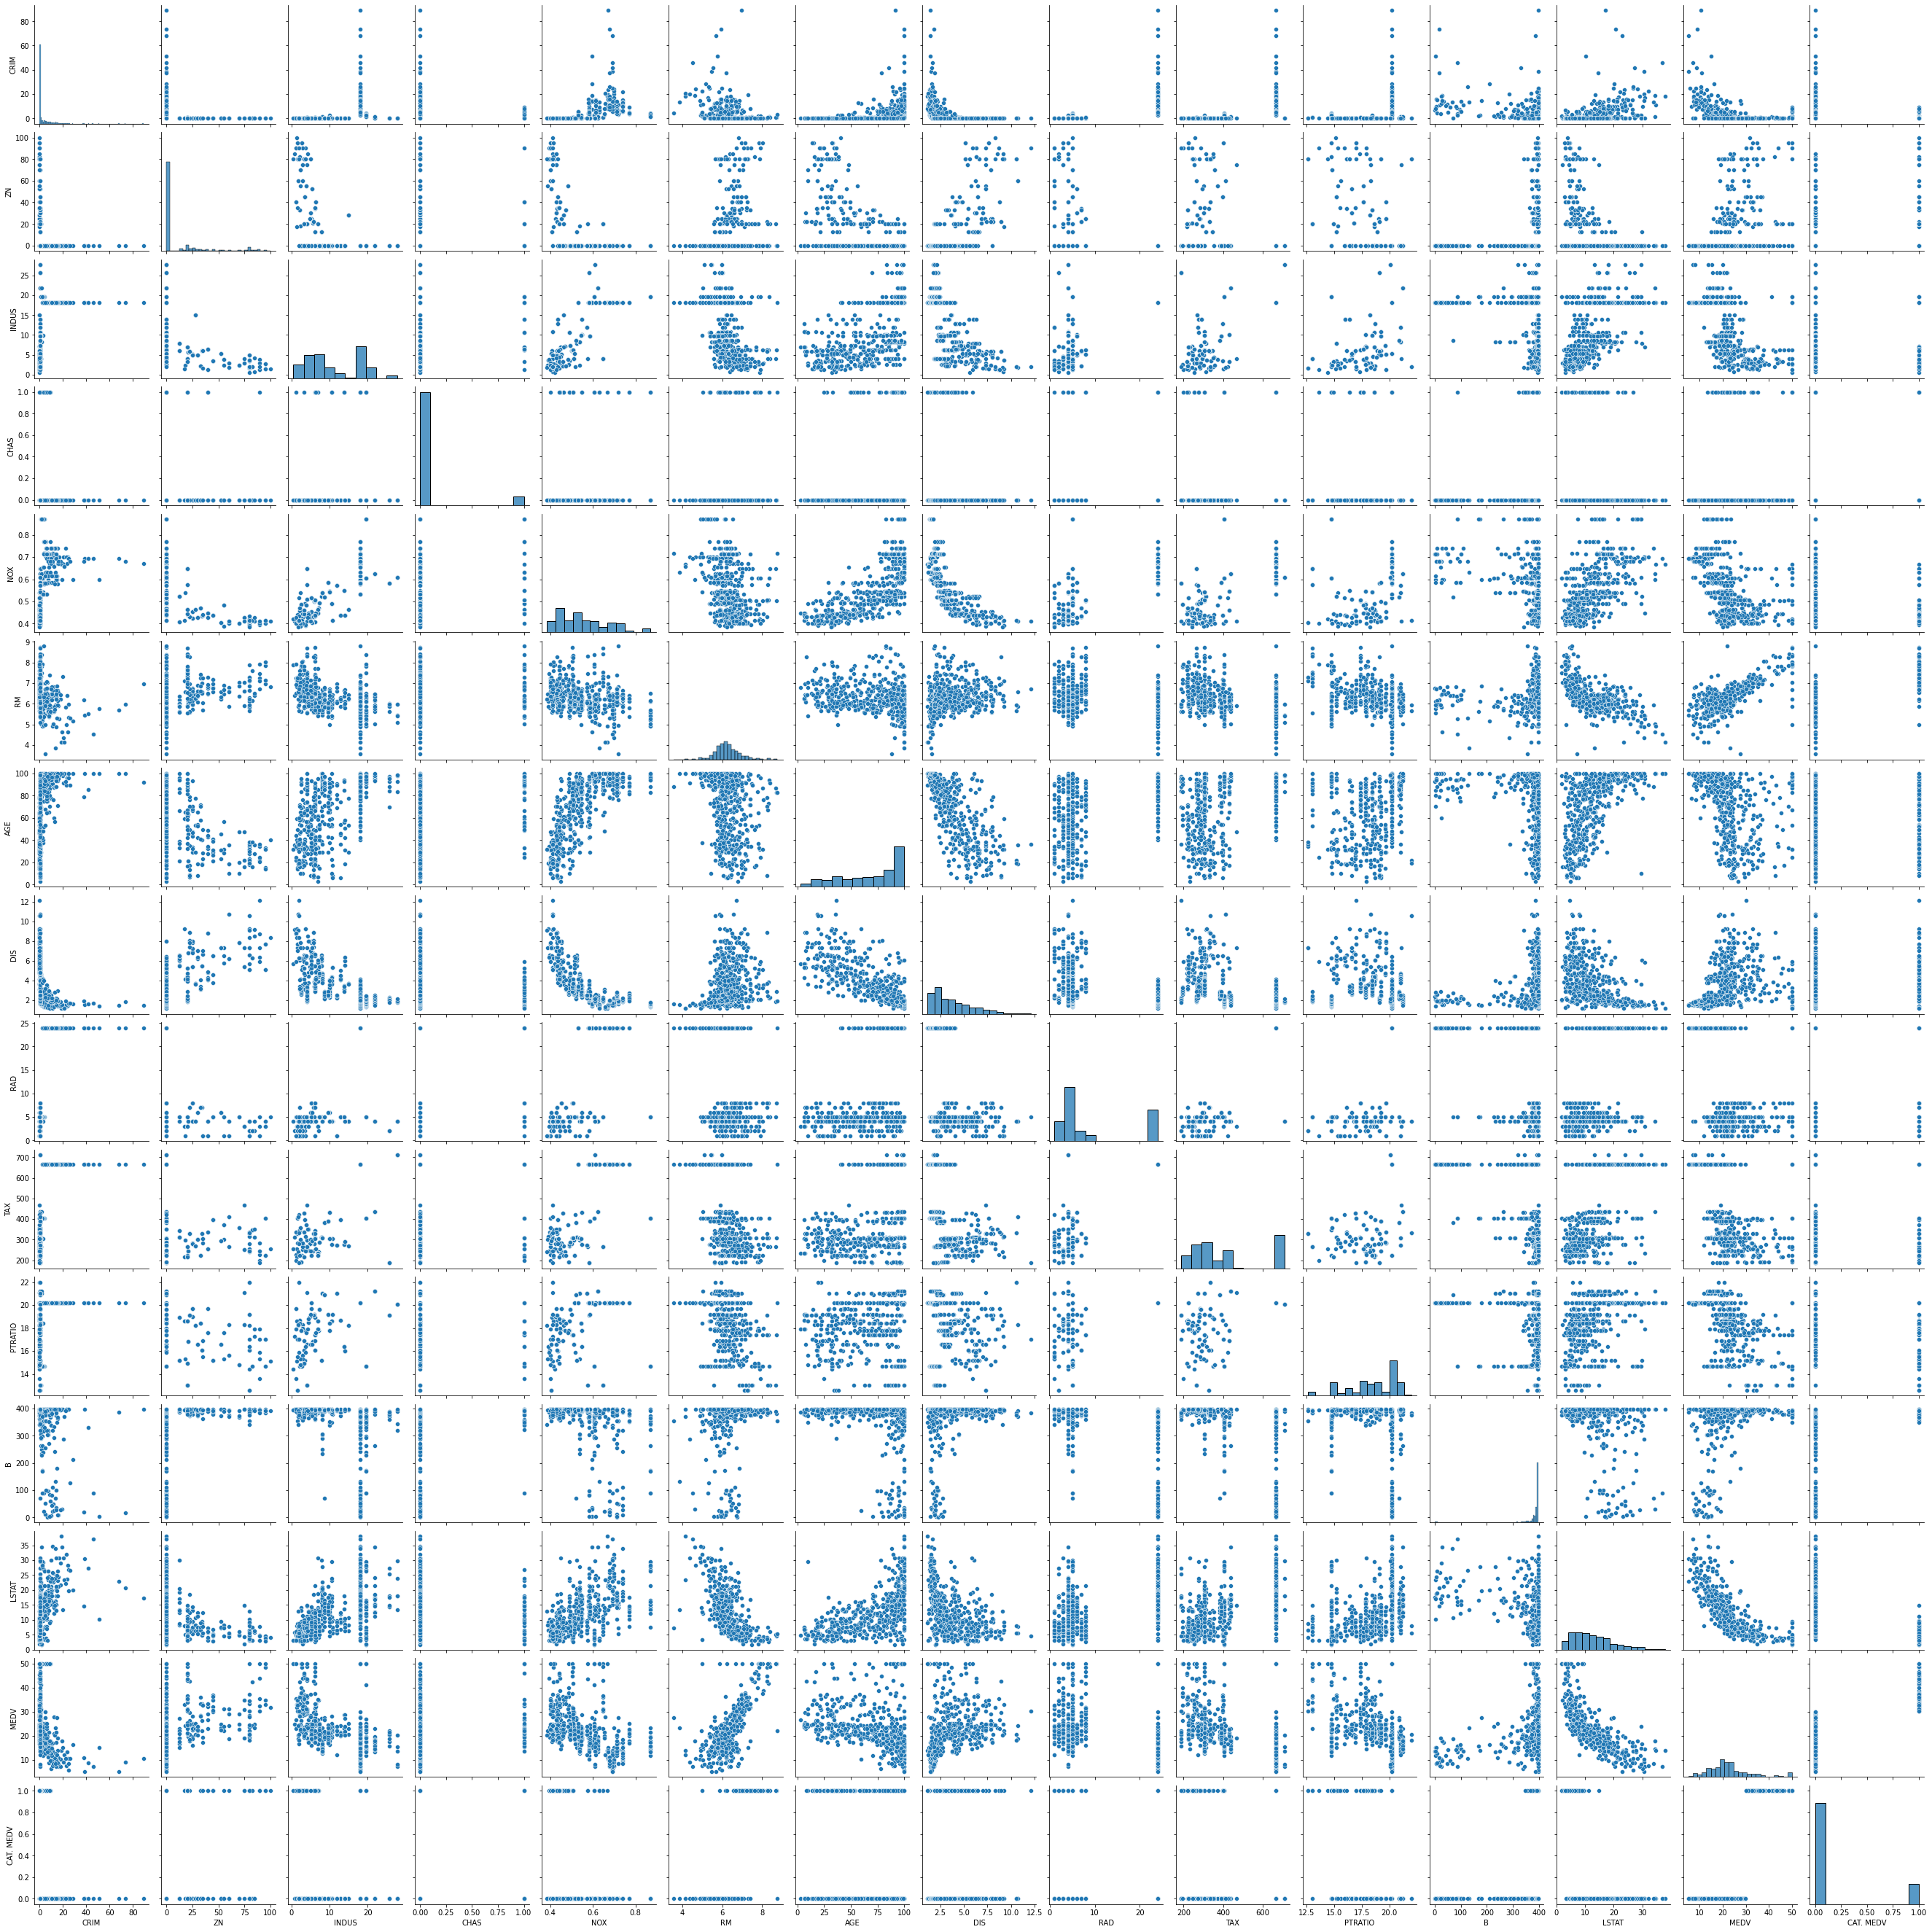

In [25]:
sns.pairplot(df)

- 상관관계가 있는 몇 개만을 뽑아서 scatter plot을 그려 확인
    - TAX와 INDUS, TAX와 RAD, NOX와 INDUS, AGE와 NOX, MEDV와 RM은 양의 상관관계를 갖고 있음
    - DIS와 INDUS, DIS와 NOX, DIS와 AGE, LSTAT와 MEDV가 음의 상관관계를 갖고 있음

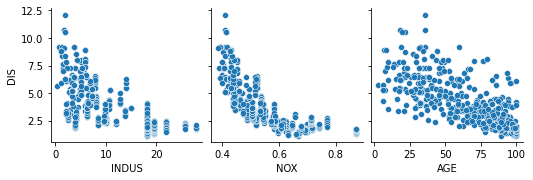

In [31]:
# DIS와 INDUS, NOX, AGE scatter plot
sns.pairplot(df, y_vars=['DIS'], x_vars=['INDUS', 'NOX', 'AGE'])

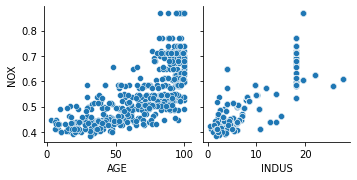

In [30]:
# NOX와 AGE, INDUS scatter plot
sns.pairplot(df, y_vars=['NOX'], x_vars=['AGE', 'INDUS'])

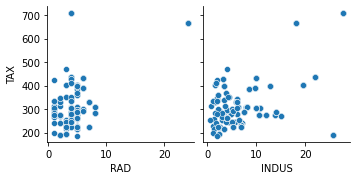

In [29]:
# TAX와 RAD, INDUS scatter plot
sns.pairplot(df, y_vars=['TAX'], x_vars=['RAD', 'INDUS'])

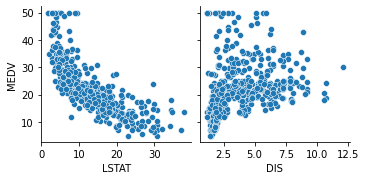

In [28]:
# MEDV와 LSTAT, DIS의 scatter plot
sns.pairplot(df, y_vars=['MEDV'], x_vars=['LSTAT','DIS'])

### RM(방의 수)과의 관계 확인하기

<AxesSubplot:xlabel='RM', ylabel='Density'>

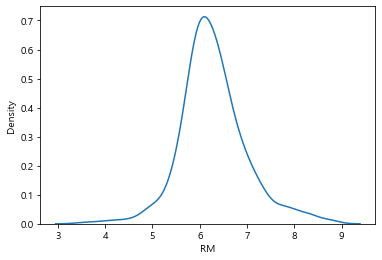

In [51]:
# 밀집도 그래프 그려 RM의 분포 알아보기
sns.kdeplot(x='RM', data=df)

In [18]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Text(0.5, 1.0, 'Barplot of RM')

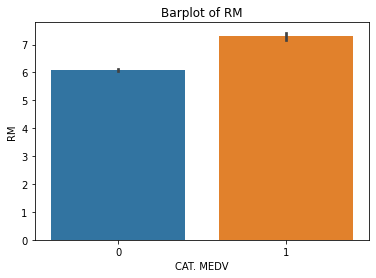

In [37]:
ax = plt.subplots()
ax = sns.barplot(x='CAT. MEDV',y='RM', data = df)
ax.set_title('Barplot of RM')

- CAT.MEDV가 0, 본인 주택 소유 가격이 30000보다 적은 사람들이 사는 곳의 RM(방의 수)이 주택 소유 가격이 30000보다 큰 사람보다 방의 수가 적었다.

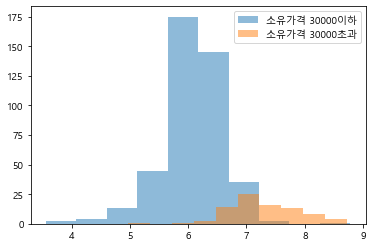

In [49]:
plt.hist(df[df['CAT. MEDV']==0]['RM'], label = '소유가격 30000이하', alpha=0.5)
plt.hist(df[df['CAT. MEDV']==1]['RM'], label = '소유가격 30000초과', alpha=0.5)
plt.legend()

- 전체적으로 소유가격이 30000이하인 사람이 더 많다는 것을 알 수 있다.
- 소유가격이 30000초과인 사람들의 RM(방의수)이 높은 수준에 분포되어 있다는 것을 알 수 있다.

### LSTAT(하위 계층 비율)와의 관계 확인하기

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

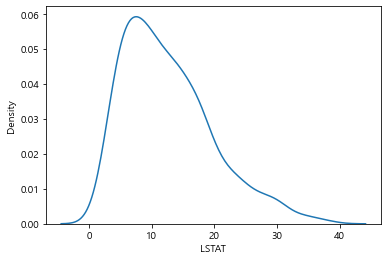

In [52]:
# 밀집도 그래프 그려 RM의 분포 알아보기
sns.kdeplot(x='LSTAT', data=df)

In [41]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Text(0.5, 1.0, 'Barplot of LSTAT')

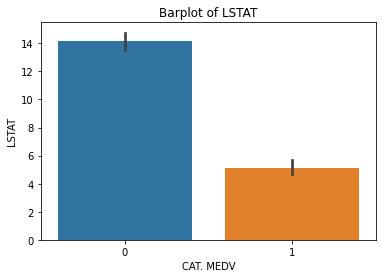

In [38]:
ax = plt.subplots()
ax = sns.barplot(x='CAT. MEDV',y='LSTAT', data = df)
ax.set_title('Barplot of LSTAT')

- CAT.MEDV가 0, 본인 주택 소유 가격이 30000보다 적은 사람들이 사는 곳의 LSTAT(하위 계층 비율)이 주택 소유 가격이 30000보다 큰 사람보다 2배 이상 높았다.

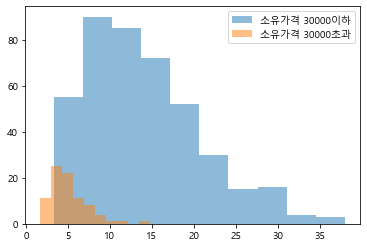

In [50]:
plt.hist(df[df['CAT. MEDV']==0]['LSTAT'], label = '소유가격 30000이하', alpha=0.5)
plt.hist(df[df['CAT. MEDV']==1]['LSTAT'], label = '소유가격 30000초과', alpha=0.5)
plt.legend()

- 전체적으로 소유가격이 30000이하인 사람이 더 많다는 것을 알 수 있다.
- 소유가격이 30000이하인 사람들의 LSTAT(하위 계층 비율)이 높은 수준에 분포되어 있다는 것을 알 수 있다.

### 다른 변수들과의 관계
CHAS, RAD_cat, TAX_cat, INDUS_cat과 MEDV의 상관관계를 구하기

#### 이변량 분석

In [89]:
# CHAS와 MEDV (찰스강 경계에 위치에 따른 집값)
how = {
    'MEDV':np.mean,
}

df.groupby(['CHAS']).agg(how)

,MEDV
CHAS,
0,22.093843
1,28.440000


Text(0.5, 1.0, 'Barplot of CHAS')

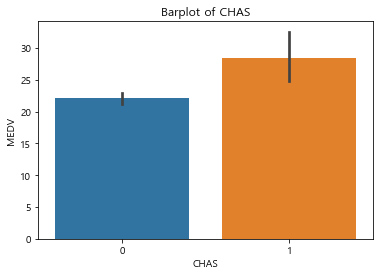

In [90]:
ax = plt.subplots()
ax = sns.barplot(x='CHAS',y='MEDV', data = df)
ax.set_title('Barplot of CHAS')

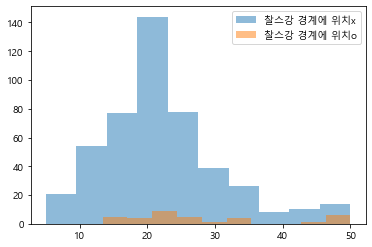

In [146]:
plt.hist(df[df['CHAS']==0]['MEDV'], label = '찰스강 경계에 위치x', alpha=0.5)
plt.hist(df[df['CHAS']==1]['MEDV'], label = '찰스강 경계에 위치o', alpha=0.5)
plt.legend()

- 찰스강 경계의 위치에 있을 때(1)가 아닐때(0)보다 가격이 더 비싸다는 것을 알 수 있다.
- 그렇지만 이 데이터는 scale 차이가 많이 나는 데이터이기 때문에 이 자료만을 보고 단순하게 찰스강이 집값에 영향을 주는 인자라고 말을 할 수는 없다.

In [91]:
# RAD_cat와 MEDV (고속도로의 접근성에 따른 집값)
how = {
    'MEDV':np.mean,
}

df.groupby(['RAD_cat']).agg(how)

,MEDV
RAD_cat,
접근 용이,16.403788
접근 용이하지 않음,24.695989


Text(0.5, 1.0, 'Barplot of RAD_cat')

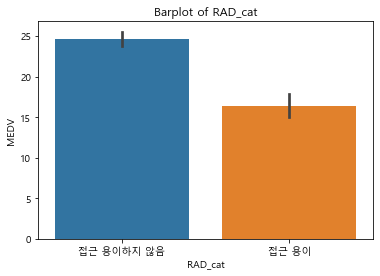

In [93]:
ax = plt.subplots()
ax = sns.barplot(x='RAD_cat',y='MEDV', data = df)
ax.set_title('Barplot of RAD_cat')

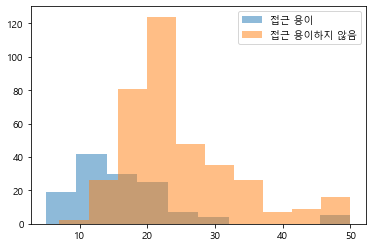

In [147]:
plt.hist(df[df['RAD_cat']=='접근 용이']['MEDV'], label = '접근 용이', alpha=0.5)
plt.hist(df[df['RAD_cat']=='접근 용이하지 않음']['MEDV'], label = '접근 용이하지 않음', alpha=0.5)
plt.legend()

- 순환고속도로 접근에 용이할 수록 가격이 더 싸다는 것을 알 수 있다.
- 그렇지만 이 데이터는 scale 차이가 많이 나는 데이터이기 때문에 이 자료만을 보고 단순하게 RAD가 집값에 영향을 주는 인자라고 말을 하기에는 어려움이 있다.

In [95]:
# TAX_cat와 MEDV (재산세율에 따른 집값)
how = {
    'MEDV':np.mean,
}

df.groupby(['TAX_cat']).agg(how)

,MEDV
TAX_cat,
낮은 부동산 세율,24.857182
높은 부동산 세율,16.272263


Text(0.5, 1.0, 'Barplot of TAX_cat')

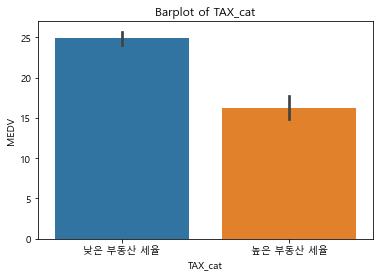

In [96]:
ax = plt.subplots()
ax = sns.barplot(x='TAX_cat',y='MEDV', data = df)
ax.set_title('Barplot of TAX_cat')

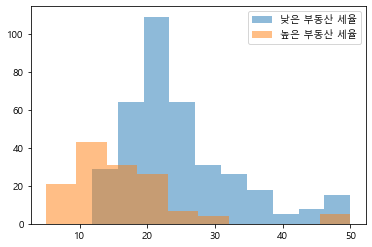

In [148]:
plt.hist(df[df['TAX_cat']=='낮은 부동산 세율']['MEDV'], label = '낮은 부동산 세율', alpha=0.5)
plt.hist(df[df['TAX_cat']=='높은 부동산 세율']['MEDV'], label = '높은 부동산 세율', alpha=0.5)
plt.legend()

- 낮은 부동산 세율을 가진 집단의 주택 가격이 더 높다는 것을 알 수 있다.

In [114]:
# INDUS_cat와 MEDV (소매업에 따른 주택 가격)
how = {
    'MEDV':np.mean,
}

df.groupby(['INDUS_cat']).agg(how)

,MEDV
INDUS_cat,
소매업 많음,25.458675
소매업 적음,17.625397


Text(0.5, 1.0, 'Barplot of INDUS_cat')

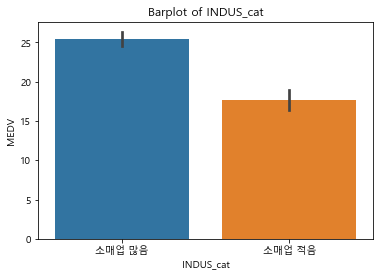

In [98]:
ax = plt.subplots()
ax = sns.barplot(x='INDUS_cat',y='MEDV', data = df)
ax.set_title('Barplot of INDUS_cat')

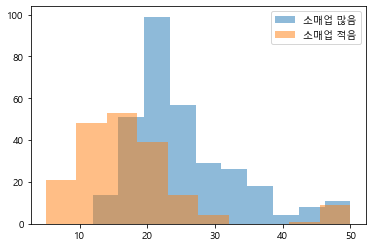

In [149]:
plt.hist(df[df['INDUS_cat']=='소매업 많음']['MEDV'], label = '소매업 많음', alpha=0.5)
plt.hist(df[df['INDUS_cat']=='소매업 적음']['MEDV'], label = '소매업 적음', alpha=0.5)
plt.legend()

- 소매업이 많은 집단이 그렇지 않은 집단보다 주택 가격이 더 높다는 것을 알 수 있다.

- 관심가는 변수 몇 개 더 찾아 분석해보기로 함
- 직관적으로 생각했을 때 CRIM과 AGE가 영향을 미칠 것이라고 생각하여서 이 두 변수를 분석해봄

In [140]:
# CHAS와 MEDV (찰스강 경계에 위치에 따른 집값)
how = {
    'CRIM':np.mean,
}

df.groupby(['CAT. MEDV']).agg(how)

,CRIM
CAT. MEDV,
0,4.196212
1,0.686206


Text(0.5, 1.0, 'Barplot of RAD_cat')

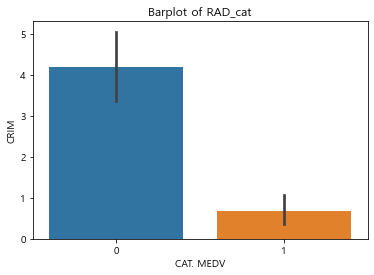

In [141]:
ax = plt.subplots()
ax = sns.barplot(x='CAT. MEDV',y='CRIM', data = df)
ax.set_title('Barplot of RAD_cat')

- 주택 가격이 높은 지역의 범죄율은 주택 가격이 높지 않은 지역의 범죄율의 약 1/4이다.

In [142]:
# CHAS와 MEDV (찰스강 경계에 위치에 따른 집값)
how = {
    'AGE':np.mean,
}

df.groupby(['CAT. MEDV']).agg(how)

,AGE
CAT. MEDV,
0,70.973697
1,56.523810


Text(0.5, 1.0, 'Barplot of RAD_cat')

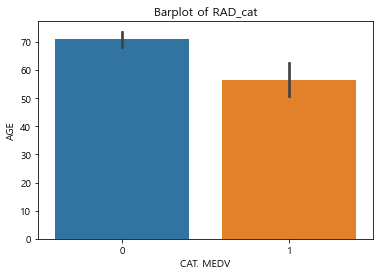

In [143]:
ax = plt.subplots()
ax = sns.barplot(x='CAT. MEDV',y='AGE', data = df)
ax.set_title('Barplot of RAD_cat')

- 주택 가격이 높은 지역의 오래된 주택 비율은 주택 가격이 높지 않은 지역의 오래된 주택 비율보다 낮다.

#### 다변량 분석

In [113]:
# 부동산 세율, 고속도로 접근 용이성, 소매업 비율에 따른 주택 가격
how = {
    'MEDV': np.mean
}

df.groupby(['TAX_cat','RAD_cat','INDUS_cat']).agg(how)

MEDV
TAX_cat   RAD_cat    INDUS_cat           
낮은 부동산 세율 접근 용이하지 않음 소매업 많음     25.458675
                     소매업 적음     21.190385
높은 부동산 세율 접근 용이      소매업 적음     16.403788
          접근 용이하지 않음 소매업 적음     12.800000

- 낮은 부동산 세율을 가지면서 고속도로 접근이 용이하지 않은 데이터는 존재하지 않는다.
- 높은 부동산 세율을 갖는 집단 데이터의 경우 소매업이 많은 데이터는 존재하지 않는다.


In [124]:
# 부동산 세율, 고속도로 접근 용이성, 소매업 비율에 따른 주택 가격 평균
how = {
    'MEDV': np.mean
}

df.groupby(['CHAS','TAX_cat']).agg(how)

MEDV
CHAS TAX_cat             
0    낮은 부동산 세율  24.642690
     높은 부동산 세율  15.336434
1    낮은 부동산 세율  27.574074
     높은 부동산 세율  31.362500

In [139]:
# 부동산 세율, 고속도로 접근 용이성, 소매업 비율에 따른 데이터 수
df.groupby(['CHAS','TAX_cat']).agg({"MEDV" : ["count"]})

MEDV
               count
CHAS TAX_cat        
0    낮은 부동산 세율   342
     높은 부동산 세율   129
1    낮은 부동산 세율    27
     높은 부동산 세율     8

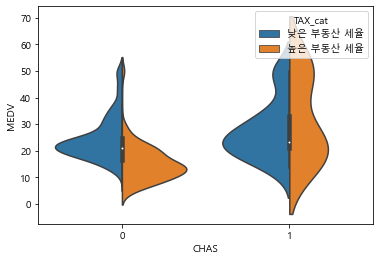

In [123]:
scatter = sns.violinplot(x='CHAS', y='MEDV', hue='TAX_cat', data=df, split=True)

- 전반적으로 찰스강 경계에 있지 않은 데이터가 더 모여있고, 찰스강 경계에 있는 데이터의 분포가 더 퍼져있다.
- 찰스강 경계에 있지 않은 데이터가 훨씬 많다.
- 찰스강 경계에 있는 데이터가 그렇지 않은 데이터보다 주택 가격 평균이 높다.

## 결과 정리

- Correlation Matrix를 그렸을 때 상관계수의 절대값이 0.7이상인 것이 서로 관련이 있는 변수라고 보고 문제를 접근하였다.
- Histogram을 그려보고 분포를 확인했을 때, 쌍봉분포를 이루는 변수들을 그룹화하여 새로운 변수를 만들어 분석하였다.ㅡ
- 주택 소유 가격이 30000초과인 집은 방의 수가 소유가격이 30000이하인 집보다 방의 수가 많다.
- 주택 소유 가격이 30000보다 적은 사람들이 사는 곳의 하위 계층 비율이 주택 소유 가격이 30000보다 큰 사람보다 2배 이상 높았다.
- 찰스강 경계에 위치하면 주택 소유 가격이 그렇지 않을 때보다 더 비싸다.
- 순환고속도로와의 접근 용이성 지표가 낮은 그룹이 그렇지 않은 그룹보다 집값이 높다.
- 부동산 세율이 낮은 그룹이 그렇지 않은 그룹보다 집값이 높다.
- 소매업이 많은 집단이 그렇지 않은 집단보다 주택 가격이 더 높다.

# 채점기준

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>